7-11. 다층 퍼셉트론(MultiLayer Perceptron, MLP)으로 텍스트 분류하기

1. 다층 퍼셉트론(MultiLayer Perceptron, MLP)
* 단층 퍼셉트론에서 은닉층이 1개 이상 추가된 신경망을 다층 퍼셉트론(MLP)라고 한다. 다층 퍼셉트론은 피드 포워드 신경망(FFNN)의 기본적인 형태이다.\
여기서 피드포워드신경망은 입력층에서 출력층으로 오직 한 방향으로만 연산 방향이 정해져 있는 신경망을 말한다.

2. 케라스의 texts_to_matrix() 이해하기

In [1]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer

In [2]:
texts = ['먹고 싶은 사과','먹고 싶은 바나나','길고 노란 바나나 바나나','저는 과일이 좋아요']

In [3]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
print(tokenizer.word_index)

{'바나나': 1, '먹고': 2, '싶은': 3, '사과': 4, '길고': 5, '노란': 6, '저는': 7, '과일이': 8, '좋아요': 9}


텍스트 데이터에 texts_to_matrix()를 사용해본다. \
총 4개의 모드를 지원하는데, 'binary','count','freq','tfidf' 이렇게 4개가 있다.

In [9]:
print(tokenizer.texts_to_matrix(texts, mode = 'count'))
# mode = count 를 사용하면 DTM 생성

[[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]


주의할점으로, 단어에 부여된 인덱스는 1부터 시작하는 반면에 완성되는 행렬의 인덱스는 0부터 시작한다.\
실제로 단어의 수는 9개였지만, 완성된 행렬의 열의 갯수는 10개이고 첫번째 열은 모든 행에서 값이 0이다.

In [10]:
print(tokenizer.texts_to_matrix(texts, mode = 'binary'))

[[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]


mode = 'binary'는 mode = 'count'와 유사하나, 단어의 존재 유무에만 관심이 있어서 단어가 몇개였는지는 무시한다.

In [11]:
print(tokenizer.texts_to_matrix(texts, mode = 'tfidf').round(2)) # 둘째 자리까지 반올림하여 출력

[[0.   0.   0.85 0.85 1.1  0.   0.   0.   0.   0.  ]
 [0.   0.85 0.85 0.85 0.   0.   0.   0.   0.   0.  ]
 [0.   1.43 0.   0.   0.   1.1  1.1  0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.1  1.1  1.1 ]]


tfidf 값이 높을수록 중요도가 높은 단어이다.

In [12]:
print(tokenizer.texts_to_matrix(texts, mode = 'freq').round(2)) # 둘째 자리까지 반올림하여 출력

[[0.   0.   0.33 0.33 0.33 0.   0.   0.   0.   0.  ]
 [0.   0.33 0.33 0.33 0.   0.   0.   0.   0.   0.  ]
 [0.   0.5  0.   0.   0.   0.25 0.25 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.33 0.33 0.33]]


mode = 'freq'는 각 문서에서 각 단어의 등장횟수를 분자로, 각 문서에서 등장한 모든 단어의 개수의 총 합을 분모로 표현하는 방법이다.

3. 20개의 뉴스 그룹(Twenty Newgroups) 데이터에 대한 이해 

In [14]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

In [15]:
newsdata = fetch_20newsgroups(subset = 'train') # 훈련데이터만 추출

In [17]:
print(newsdata.keys())

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [18]:
print('훈련용 샘플의 개수 : {}'.format(len(newsdata.data)))

훈련용 샘플의 개수 : 11314


In [19]:
print('총 주제의 개수 : {}'.format(len(newsdata.target_names)))
print(newsdata.target_names)

총 주제의 개수 : 20
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [20]:
print('첫번째 샘플의 레이블 : {}'.format(newsdata.target[0]))

첫번째 샘플의 레이블 : 7


In [21]:
print('7번 레이블이 의미하는 주제 : {}'.format(newsdata.target_names[7]))

7번 레이블이 의미하는 주제 : rec.autos


In [22]:
print(newsdata.data[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [24]:
data = pd.DataFrame(newsdata.data, columns = ['email'])
data['target'] = pd.Series(newsdata.target)
data[:5]

,email,target
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11314 entries, 0 to 11313
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   11314 non-null  object
 1   target  11314 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 132.7+ KB


In [26]:
data.isnull().values.any() # Null값을 가진 샘플이 있는지 확인

False

In [27]:
print('중복을 제외한 샘플의 수 : {}'.format(data['email'].nunique()))
print('중복을 제외한 주제의 수 : {}'.format(data['target'].nunique()))

중복을 제외한 샘플의 수 : 11314
중복을 제외한 주제의 수 : 20


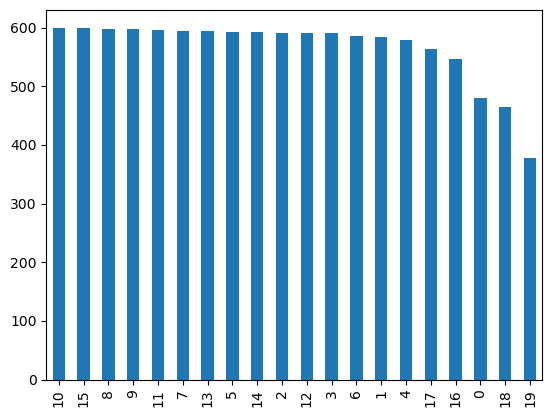

In [30]:
data['target'].value_counts().plot(kind = 'bar');

In [32]:
print(data.groupby('target').size().reset_index(name='count'))

    target  count
0        0    480
1        1    584
2        2    591
3        3    590
4        4    578
5        5    593
6        6    585
7        7    594
8        8    598
9        9    597
10      10    600
11      11    595
12      12    591
13      13    594
14      14    593
15      15    599
16      16    546
17      17    564
18      18    465
19      19    377


In [33]:
newsdata_test = fetch_20newsgroups(subset = 'test', shuffle = True)
train_email = data['email']
train_label = data['target']
test_email = newsdata_test.data
test_label = newsdata_test.target

In [34]:
vocab_size = 10000 # 최대 단어 개수
num_classes = 20

In [35]:
def prepare_data(train_data, test_data, mode): # 전처리 함수
    tokenizer = Tokenizer(num_words = vocab_size) # vocab_size(=10000) 개수 만큼의 단어만 사용
    tokenizer.fit_on_texts(train_data)
    X_train = tokenizer.texts_to_matrix(train_data, mode = mode) # 샘플 수 x vocab_size 크기의 행렬 생성
    X_test = tokenizer.texts_to_matrix(test_data, mode = mode) # 샘플 수 x vocab_size 크기의 행렬 생성
    return X_train, X_test, tokenizer.index_word

In [36]:
X_train, X_test, index_to_word = prepare_data(train_email, test_email, 'binary') # binary 모드로 변환
y_train = to_categorical(train_label, num_classes) # 원-핫 인코딩
y_test = to_categorical(test_label, num_classes)# 원-핫 인코딩

In [37]:
print('훈련 샘플 본문의 크기 : {}'.format(X_train.shape))
print('훈련 샘플 레이블의 크기 : {}'.format(y_train.shape))
print('테스트 샘플 본문의 크기 : {}'.format(X_test.shape))
print('테스트 샘플 레이블의 크기 : {}'.format(y_test.shape))

훈련 샘플 본문의 크기 : (11314, 10000)
훈련 샘플 레이블의 크기 : (11314, 20)
테스트 샘플 본문의 크기 : (7532, 10000)
테스트 샘플 레이블의 크기 : (7532, 20)


In [38]:
print('빈도수 상위 1번 단어 : {}'.format(index_to_word[1]))
print('빈도수 상위 9999번 단어 : {}'.format(index_to_word[9999]))

빈도수 상위 1번 단어 : the
빈도수 상위 9999번 단어 : mic


4. 다층 퍼셉트론(Multilayer Perceptron, MLP)을 사용하여 텍스트 분류하기

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [43]:
def fit_and_evaluate(X_train, y_train, X_test, y_test) : 
    model = Sequential()
    model.add(Dense(256, input_shape = (vocab_size,), activation = 'relu'))
    model.add(Dropout(0.5)) # 과적합 방지
    model.add(Dense(128, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation = 'softmax')) # 다중 클래스 분류 문제라서 softmax 사용
    
    model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, batch_size = 128, epochs = 5, verbose = 1, validation_split = 0.1)
    score = model.evaluate(X_test, y_test, batch_size = 128, verbose = 0)
    return score[1]

In [44]:
modes = ['binary', 'count', 'tfidf', 'freq'] # 4개의 모드를 리스트에 저장.

for mode in modes: # 4개의 모드에 대해서 각각 아래의 작업을 반복한다.
    X_train, X_test, _ = prepare_data(train_email, test_email, mode) # 모드에 따라서 데이터를 전처리
    score = fit_and_evaluate(X_train, y_train, X_test, y_test) # 모델을 훈련하고 평가.
    print(mode+' 모드의 테스트 정확도:', score)

Epoch 1/5
80/80 [==============================] - 4s 39ms/step - loss: 2.3076 - accuracy: 0.3317 - val_loss: 0.9633 - val_accuracy: 0.8154
Epoch 2/5
80/80 [==============================] - 3s 36ms/step - loss: 0.8891 - accuracy: 0.7593 - val_loss: 0.4734 - val_accuracy: 0.8852
Epoch 3/5
80/80 [==============================] - 3s 38ms/step - loss: 0.4353 - accuracy: 0.8846 - val_loss: 0.3689 - val_accuracy: 0.8975
Epoch 4/5
80/80 [==============================] - 3s 37ms/step - loss: 0.2617 - accuracy: 0.9359 - val_loss: 0.3232 - val_accuracy: 0.9108
Epoch 5/5
80/80 [==============================] - 3s 37ms/step - loss: 0.1697 - accuracy: 0.9610 - val_loss: 0.3055 - val_accuracy: 0.9134
binary 모드의 테스트 정확도: 0.8284652233123779
Epoch 1/5
80/80 [==============================] - 4s 39ms/step - loss: 2.7048 - accuracy: 0.2497 - val_loss: 1.6189 - val_accuracy: 0.7747
Epoch 2/5
80/80 [==============================] - 3s 36ms/step - loss: 1.4074 - accuracy: 0.6385 - val_loss: 0.6794 - va

binary, count, tfidf는 82~83%의 정확도를 보이나, freq 모드에서만 정확도가 69%로 나왔다. \
이는 freq 모드는 이번 다중 클래스 분류에 있어서 적절한 전처리 방법이 아닌것으로 판단된다.